In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv("flight_train.tsv",sep="\t")
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df2=pd.read_csv("flight_test.tsv",sep="\t")
df2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### Merging the two data as df

In [4]:
df=pd.merge(df1,df2,how="outer")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
13146,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13147,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13148,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13149,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [5]:
df.shape

(13151, 11)

We have 13151 rows and 11 columns in the dataset

In [7]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

These are the total columns present in the dataset,"Price" is our target variable

In [6]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

Here we have float and string type data,hence encoding needs to be applied

In [8]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2454
dtype: int64

We have null values present in the dataset

In [11]:
df.Price.value_counts()

10262.0    258
10844.0    212
7229.0     162
4804.0     160
4823.0     131
          ... 
11633.0      1
3673.0       1
19681.0      1
5703.0       1
10711.0      1
Name: Price, Length: 1870, dtype: int64

We have float type data present in our both target variable,hence we will apply regression here

# APPLYING ENCODING

In [9]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [10]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3.0,24.0,0.0,5.0,18.0,211.0,264.0,242.0,4.0,8.0,3897.0
1,1.0,6.0,3.0,0.0,87.0,31.0,986.0,342.0,1.0,8.0,7662.0
2,4.0,43.0,2.0,1.0,122.0,70.0,468.0,106.0,1.0,8.0,13882.0
3,3.0,10.0,3.0,0.0,95.0,164.0,1430.0,317.0,0.0,8.0,6218.0
4,3.0,0.0,0.0,5.0,29.0,149.0,1331.0,309.0,0.0,8.0,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
13146,1.0,39.0,3.0,0.0,76.0,190.0,1283.0,168.0,0.0,8.0,NaN
13147,3.0,28.0,3.0,0.0,67.0,122.0,1097.0,239.0,4.0,8.0,NaN
13148,4.0,36.0,2.0,1.0,108.0,205.0,464.0,332.0,0.0,8.0,NaN
13149,1.0,36.0,2.0,1.0,108.0,16.0,1212.0,62.0,0.0,8.0,NaN


We have converted the datas to float type by using  OrdinalEncoder

# TREATING THE NAN VALUES

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Nan values are no longer present in the dataset 

# STATISTICAL SUMMARY

In [14]:
df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10696.000000,10696.000000,10696.000000,10696.000000,10696.000000,10696.000000,10696.000000,10696.000000,10696.000000,10696.000000,10696.000000
mean,3.965034,23.734667,1.951758,1.436705,77.577786,108.012248,945.483545,196.369577,1.458489,7.392670,9089.054132
std,2.351189,12.334261,1.176961,1.475153,38.259126,61.178624,350.345956,110.642751,1.805699,1.214483,4609.967393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,49.000000,55.000000,671.000000,107.000000,0.000000,8.000000,5277.000000
50%,4.000000,24.000000,2.000000,1.000000,76.000000,96.000000,1018.000000,235.000000,0.000000,8.000000,8372.000000
75%,4.000000,35.000000,3.000000,2.000000,108.000000,164.000000,1229.000000,284.000000,4.000000,8.000000,12373.000000
max,11.000000,43.000000,4.000000,5.000000,131.000000,222.000000,1449.000000,373.000000,4.000000,9.000000,79512.000000


Here is the statistical summary of df dataset

Key observation:
 
 1. The mean higher than the median(50th percentile) in column 'Price' skewness might be present in these columns
 2. we observe extreme difference between the 75th percentile and max in column 'Price',outliers can be present in these columns

# DATA VISUALIZATION 

To check he missing values

<AxesSubplot:>

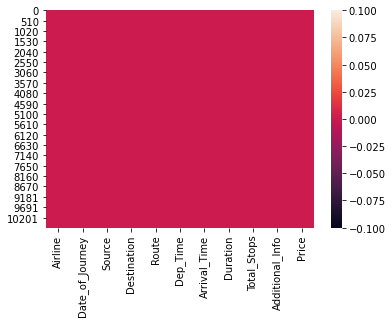

In [15]:
sns.heatmap(df.isnull())

No missing values are present in df dataset

# To check the correlation

In [16]:
cor=df.corr()
cor

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,0.022433,-0.013145,0.018152,0.024477,-0.040138,-0.018200,0.027951,0.035821,-0.060942,-0.039581
Date_of_Journey,0.022433,1.000000,0.167418,-0.273007,0.274902,-0.008064,-0.013067,-0.000767,-0.044046,0.008354,-0.036806
Source,-0.013145,0.167418,1.000000,-0.592971,0.408545,0.054347,0.020042,-0.191133,-0.226113,-0.022331,0.016284
Destination,0.018152,-0.273007,-0.592971,1.000000,-0.469086,-0.062276,-0.035352,0.020500,0.338506,0.027235,-0.071603
Route,0.024477,0.274902,0.408545,-0.469086,1.000000,-0.081544,0.009800,-0.059827,-0.442582,0.033135,0.167571
Dep_Time,-0.040138,-0.008064,0.054347,-0.062276,-0.081544,1.000000,-0.026675,0.040948,0.045226,-0.051450,0.002645
Arrival_Time,-0.018200,-0.013067,0.020042,-0.035352,0.009800,-0.026675,1.000000,0.028277,-0.097402,0.016899,0.028231
Duration,0.027951,-0.000767,-0.191133,0.020500,-0.059827,0.040948,0.028277,1.000000,0.169228,0.079726,-0.141333
Total_Stops,0.035821,-0.044046,-0.226113,0.338506,-0.442582,0.045226,-0.097402,0.169228,1.000000,0.164166,-0.571240
Additional_Info,-0.060942,0.008354,-0.022331,0.027235,0.033135,-0.051450,0.016899,0.079726,0.164166,1.000000,-0.065300


<AxesSubplot:>

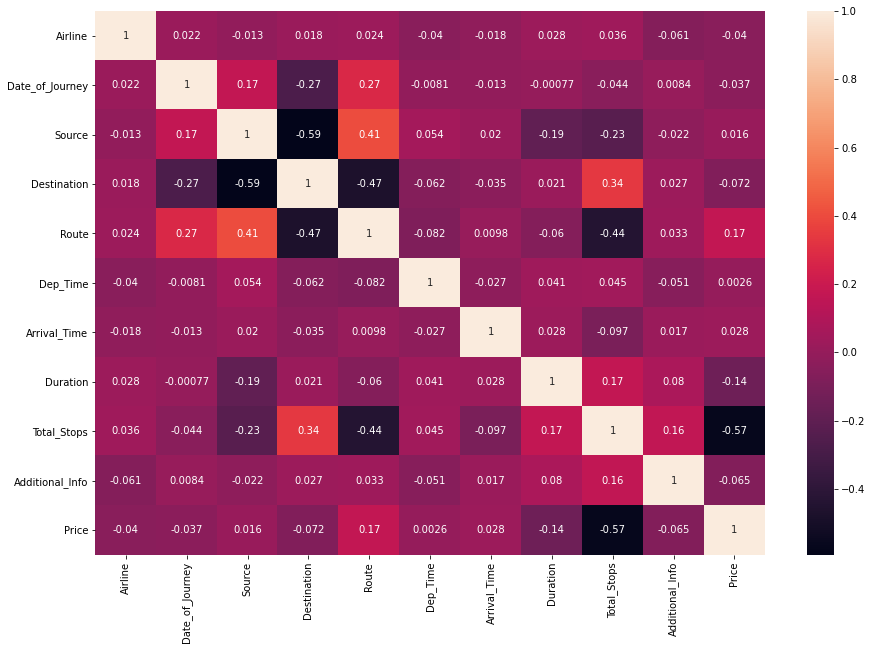

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

Observation:
    
Light shades are highly correlated and dark shades are negatively correated 
    
"Price" is highly negatively correlated with column 'Total_Stops'and positively correlated with "Route"

 column

# PLOTTING OUTLIERS

Airline               AxesSubplot(0.125,0.536818;0.110714x0.343182)
Date_of_Journey    AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Source             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Destination        AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Route              AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Dep_Time           AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Arrival_Time             AxesSubplot(0.125,0.125;0.110714x0.343182)
Duration              AxesSubplot(0.257857,0.125;0.110714x0.343182)
Total_Stops           AxesSubplot(0.390714,0.125;0.110714x0.343182)
Additional_Info       AxesSubplot(0.523571,0.125;0.110714x0.343182)
Price                 AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

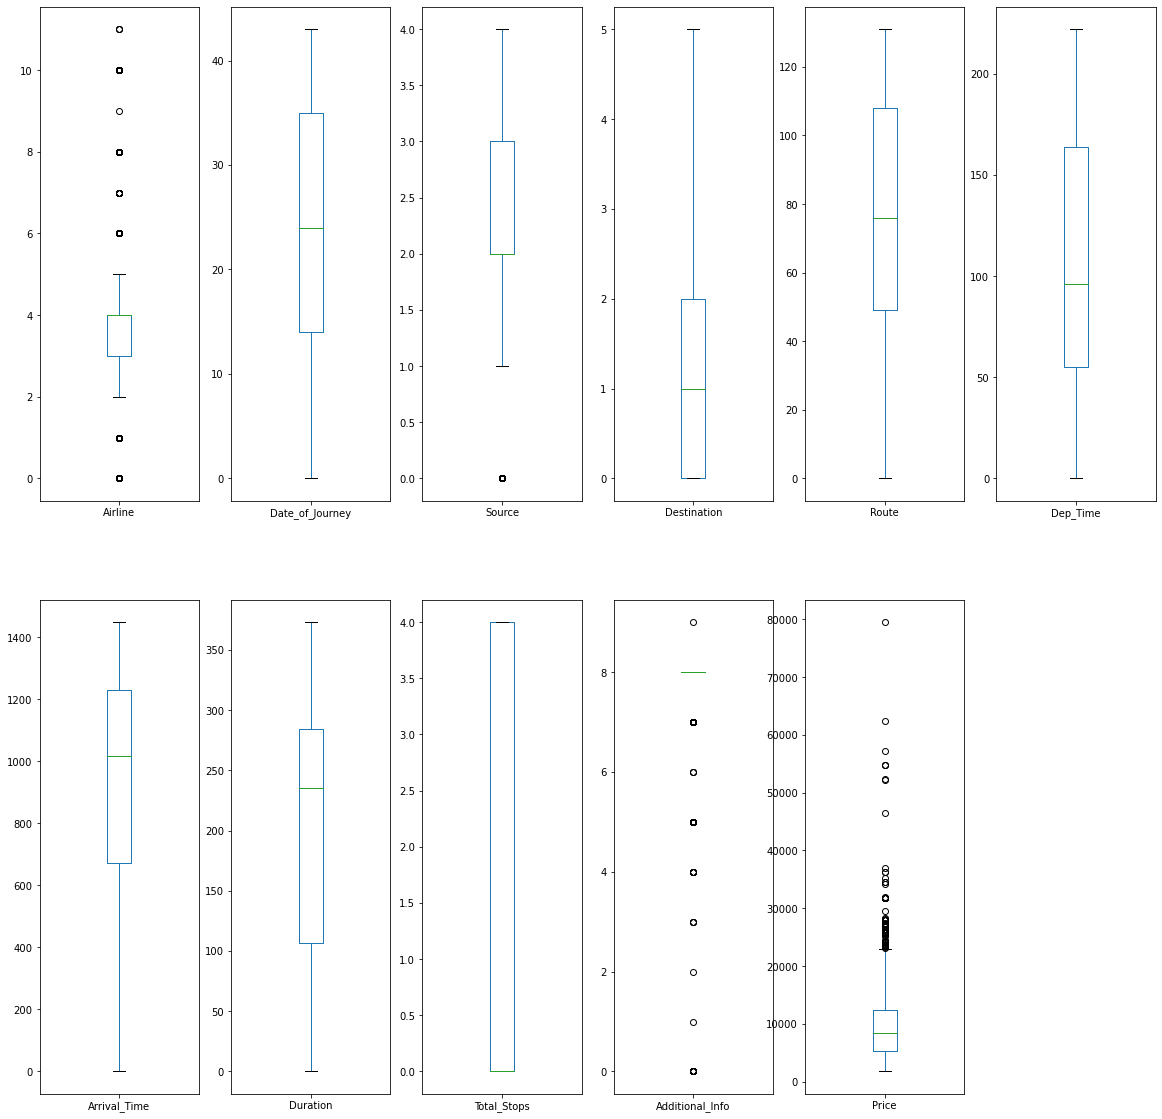

In [18]:
df.plot(kind="box",subplots=True,layout=(2,6),figsize=(20,20))

We have outliers present in column 'Airline','Additional_Info','Price'

# TO CHECK THE DISTRIBUTION OF DATA IN COLUMNS

<AxesSubplot:xlabel='Airline', ylabel='Density'>

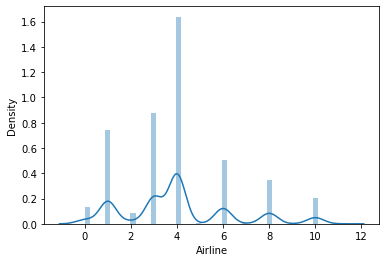

In [21]:
sns.distplot(df["Airline"])

in "Airline" column datas are not equally distributed

<AxesSubplot:xlabel='Date_of_Journey', ylabel='Density'>

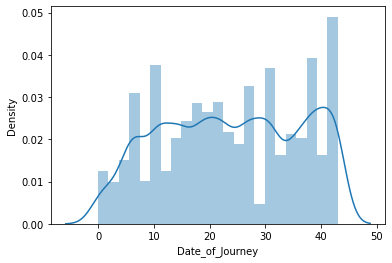

In [22]:
sns.distplot(df["Date_of_Journey"])

in "Date_of_Journey" column datas are not equally distributed

<AxesSubplot:xlabel='Source', ylabel='Density'>

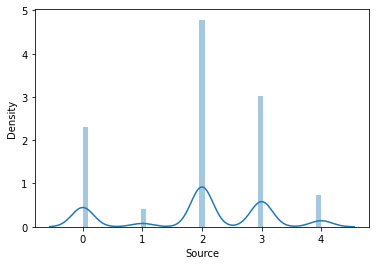

In [23]:
sns.distplot(df["Source"])

in "Source" column datas are not equally distributed

<AxesSubplot:xlabel='Destination', ylabel='Density'>

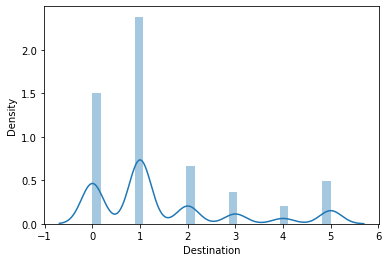

In [24]:
sns.distplot(df["Destination"])

in "Destination" column datas are not equally distributed

<AxesSubplot:xlabel='Route', ylabel='Density'>

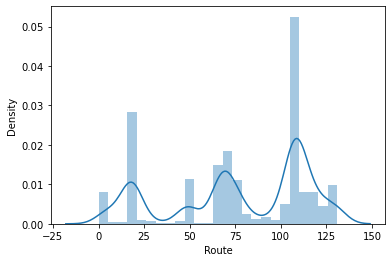

In [25]:
sns.distplot(df["Route"])

in "Route" column datas are not equally distributed

<AxesSubplot:xlabel='Dep_Time', ylabel='Density'>

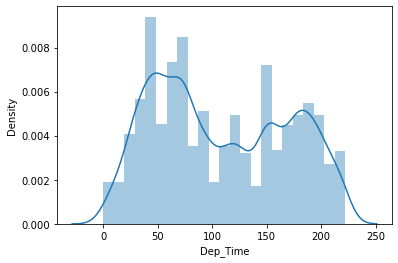

In [26]:
sns.distplot(df["Dep_Time"])

in "Dep_Time" column datas are not equally distributed

<AxesSubplot:xlabel='Arrival_Time', ylabel='Density'>

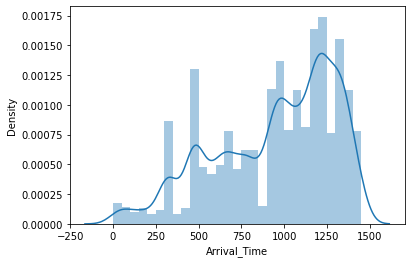

In [27]:
sns.distplot(df["Arrival_Time"])

in "Arrival_Time" column datas are not equally distributed

<AxesSubplot:xlabel='Duration', ylabel='Density'>

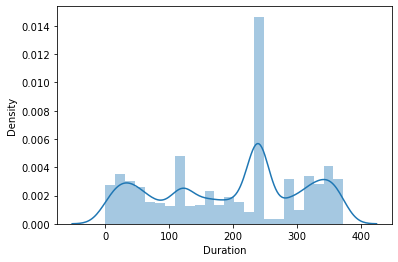

In [28]:
sns.distplot(df["Duration"])

in "Duration" column datas are not equally distributed

<AxesSubplot:xlabel='Total_Stops', ylabel='Density'>

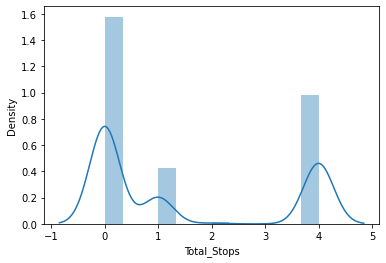

In [29]:
sns.distplot(df["Total_Stops"])

in "Total_Stops" column datas are not equally distributed

<AxesSubplot:xlabel='Price', ylabel='Density'>

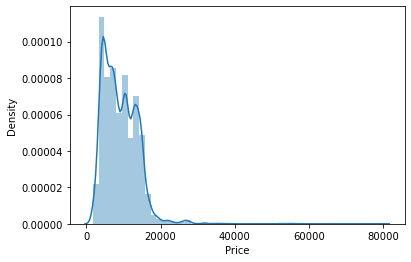

In [30]:
sns.distplot(df["Price"])

in "Price" column datas are not equally distributed

# TO CHECK THE FREQUENCY OF THE DATA IN THE COLUMNS

### UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='Airline', ylabel='Count'>

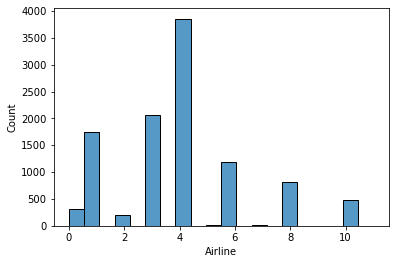

In [32]:
sns.histplot(df["Airline"],bins=20)

Data spread in column "Airline" is from 0 to 10

<AxesSubplot:xlabel='Date_of_Journey', ylabel='Count'>

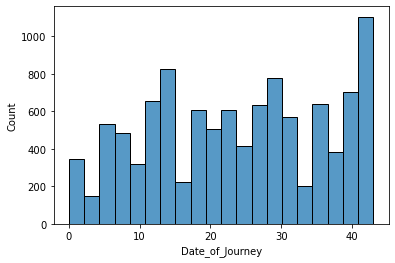

In [33]:
sns.histplot(df["Date_of_Journey"],bins=20)

Data spread in column "Date_of_Journey" is from 0 to 40

<AxesSubplot:xlabel='Source', ylabel='Count'>

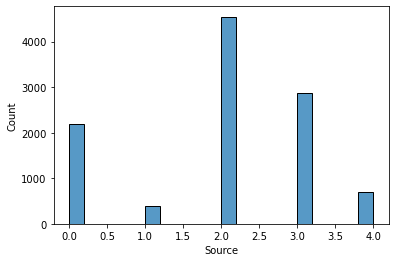

In [34]:
sns.histplot(df["Source"],bins=20)

Data spread in column "Source" is between  0.0,1.0,2.0,3.0 & 4.0

<AxesSubplot:xlabel='Destination', ylabel='Count'>

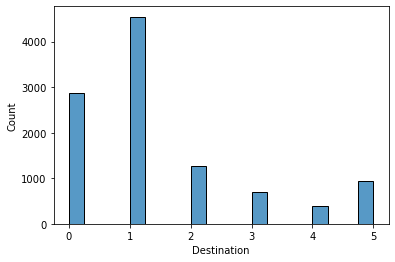

In [35]:
sns.histplot(df["Destination"],bins=20)

Data spread in column "Destination" is between  0,1,2,3,4 & 5

<AxesSubplot:xlabel='Route', ylabel='Count'>

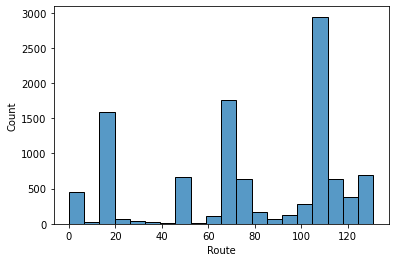

In [36]:
sns.histplot(df["Route"],bins=20)

Data spread in column "Route" is between  0 to 125

<AxesSubplot:xlabel='Dep_Time', ylabel='Count'>

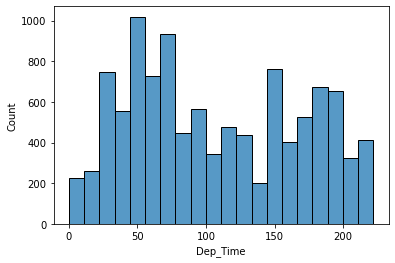

In [37]:
sns.histplot(df["Dep_Time"],bins=20)

Data spread in column "Dep_Time" is between  0 to 220

<AxesSubplot:xlabel='Arrival_Time', ylabel='Count'>

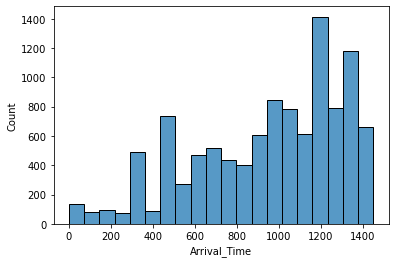

In [38]:
sns.histplot(df["Arrival_Time"],bins=20)

Data spread in column "Arrival_Time" is between  0 to 1400

<AxesSubplot:xlabel='Duration', ylabel='Count'>

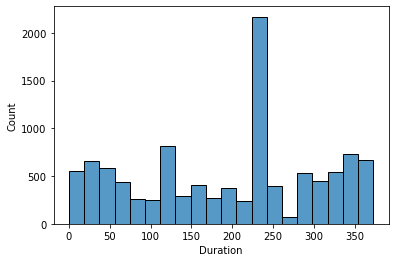

In [39]:
sns.histplot(df["Duration"],bins=20)

Data spread in column "Duration" is between  0 to 360

<AxesSubplot:xlabel='Total_Stops', ylabel='Count'>

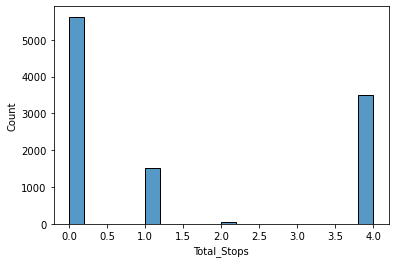

In [40]:
sns.histplot(df["Total_Stops"],bins=20)

Data spread in column "Total_Stops" is between  0.0,1.0,2.0 & 4.0

<AxesSubplot:xlabel='Additional_Info', ylabel='Count'>

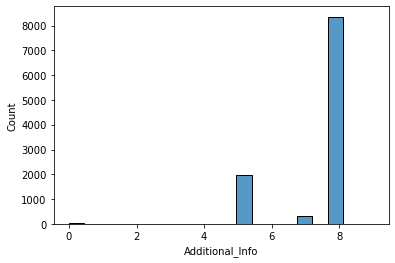

In [41]:
sns.histplot(df["Additional_Info"],bins=20)

Data spread in column "Additional_Info" is between  0 to 8

<AxesSubplot:xlabel='Price', ylabel='Count'>

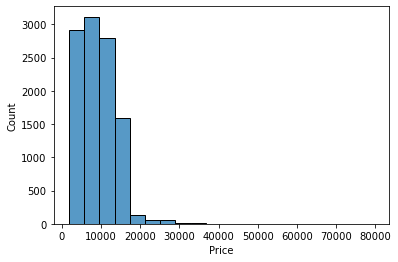

In [42]:
sns.histplot(df["Price"],bins=20)

Data spread in column "Price" is between  0 to 35000

# TO CHECK THE RELATION OF EACH COLUMN TARGET VARIABLE

<AxesSubplot:xlabel='Airline', ylabel='Price'>

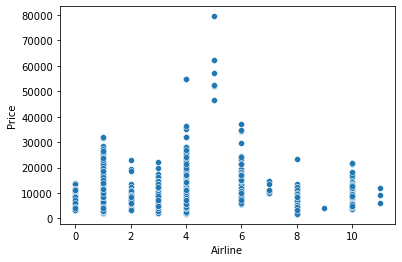

In [44]:
sns.scatterplot(x="Airline",y="Price",data=df)

High Data spread is between 0 to 15

<AxesSubplot:xlabel='Date_of_Journey', ylabel='Price'>

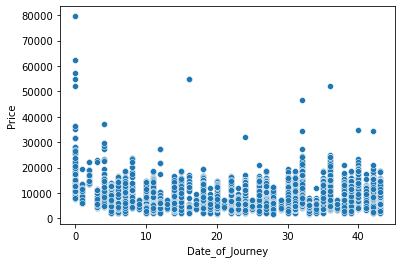

In [45]:
sns.scatterplot(x="Date_of_Journey",y="Price",data=df)

High Data spread is between 0 to 45

<AxesSubplot:xlabel='Source', ylabel='Price'>

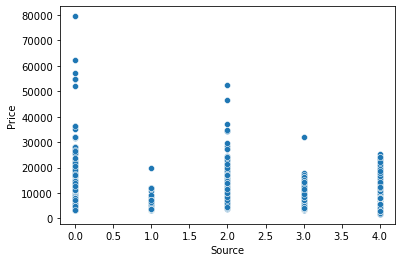

In [46]:
sns.scatterplot(x="Source",y="Price",data=df)

Data spread is between 0.0,1.0,2.0,4.0

<AxesSubplot:xlabel='Destination', ylabel='Price'>

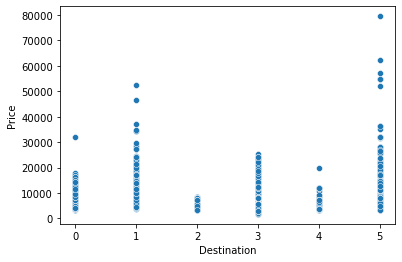

In [47]:
sns.scatterplot(x="Destination",y="Price",data=df)

Data spread is between 0,1,2,3,4,5

<AxesSubplot:xlabel='Route', ylabel='Price'>

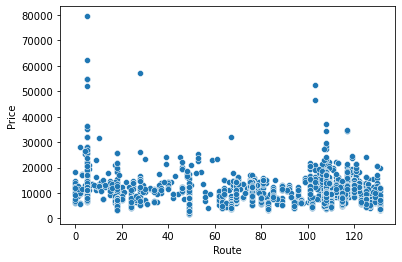

In [48]:
sns.scatterplot(x="Route",y="Price",data=df)

high data spread is between 0 to 130

<AxesSubplot:xlabel='Dep_Time', ylabel='Price'>

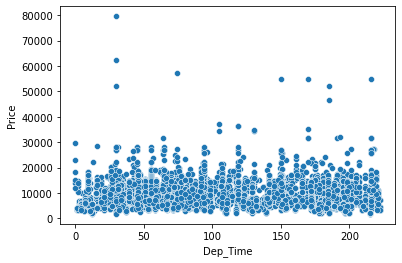

In [49]:
sns.scatterplot(x="Dep_Time",y="Price",data=df)

high data spread is between 0 to 220

<AxesSubplot:xlabel='Arrival_Time', ylabel='Price'>

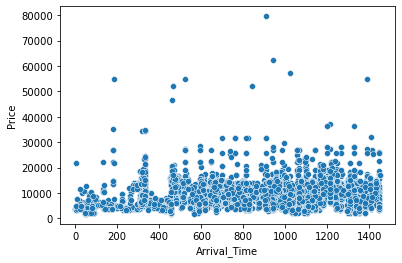

In [50]:
sns.scatterplot(x="Arrival_Time",y="Price",data=df)

<AxesSubplot:xlabel='Duration', ylabel='Price'>

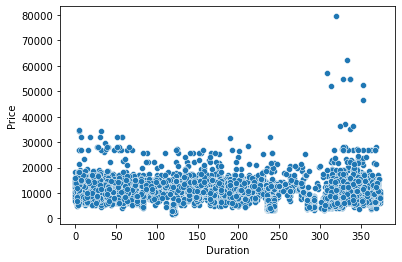

In [51]:
sns.scatterplot(x="Duration",y="Price",data=df)

high data spread is between 0 to 360

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

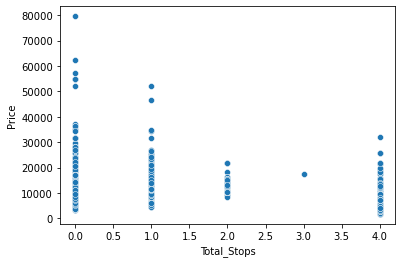

In [52]:
sns.scatterplot(x="Total_Stops",y="Price",data=df)

high data spread is between 0.0,1.0,2.0,3.0,4.0

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

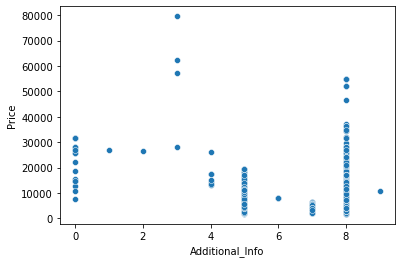

In [53]:
sns.scatterplot(x="Additional_Info",y="Price",data=df)

high data spread is between 0 to 9

# TO CHECK THE RELATION BETWEEN ALL THE COLUMNS

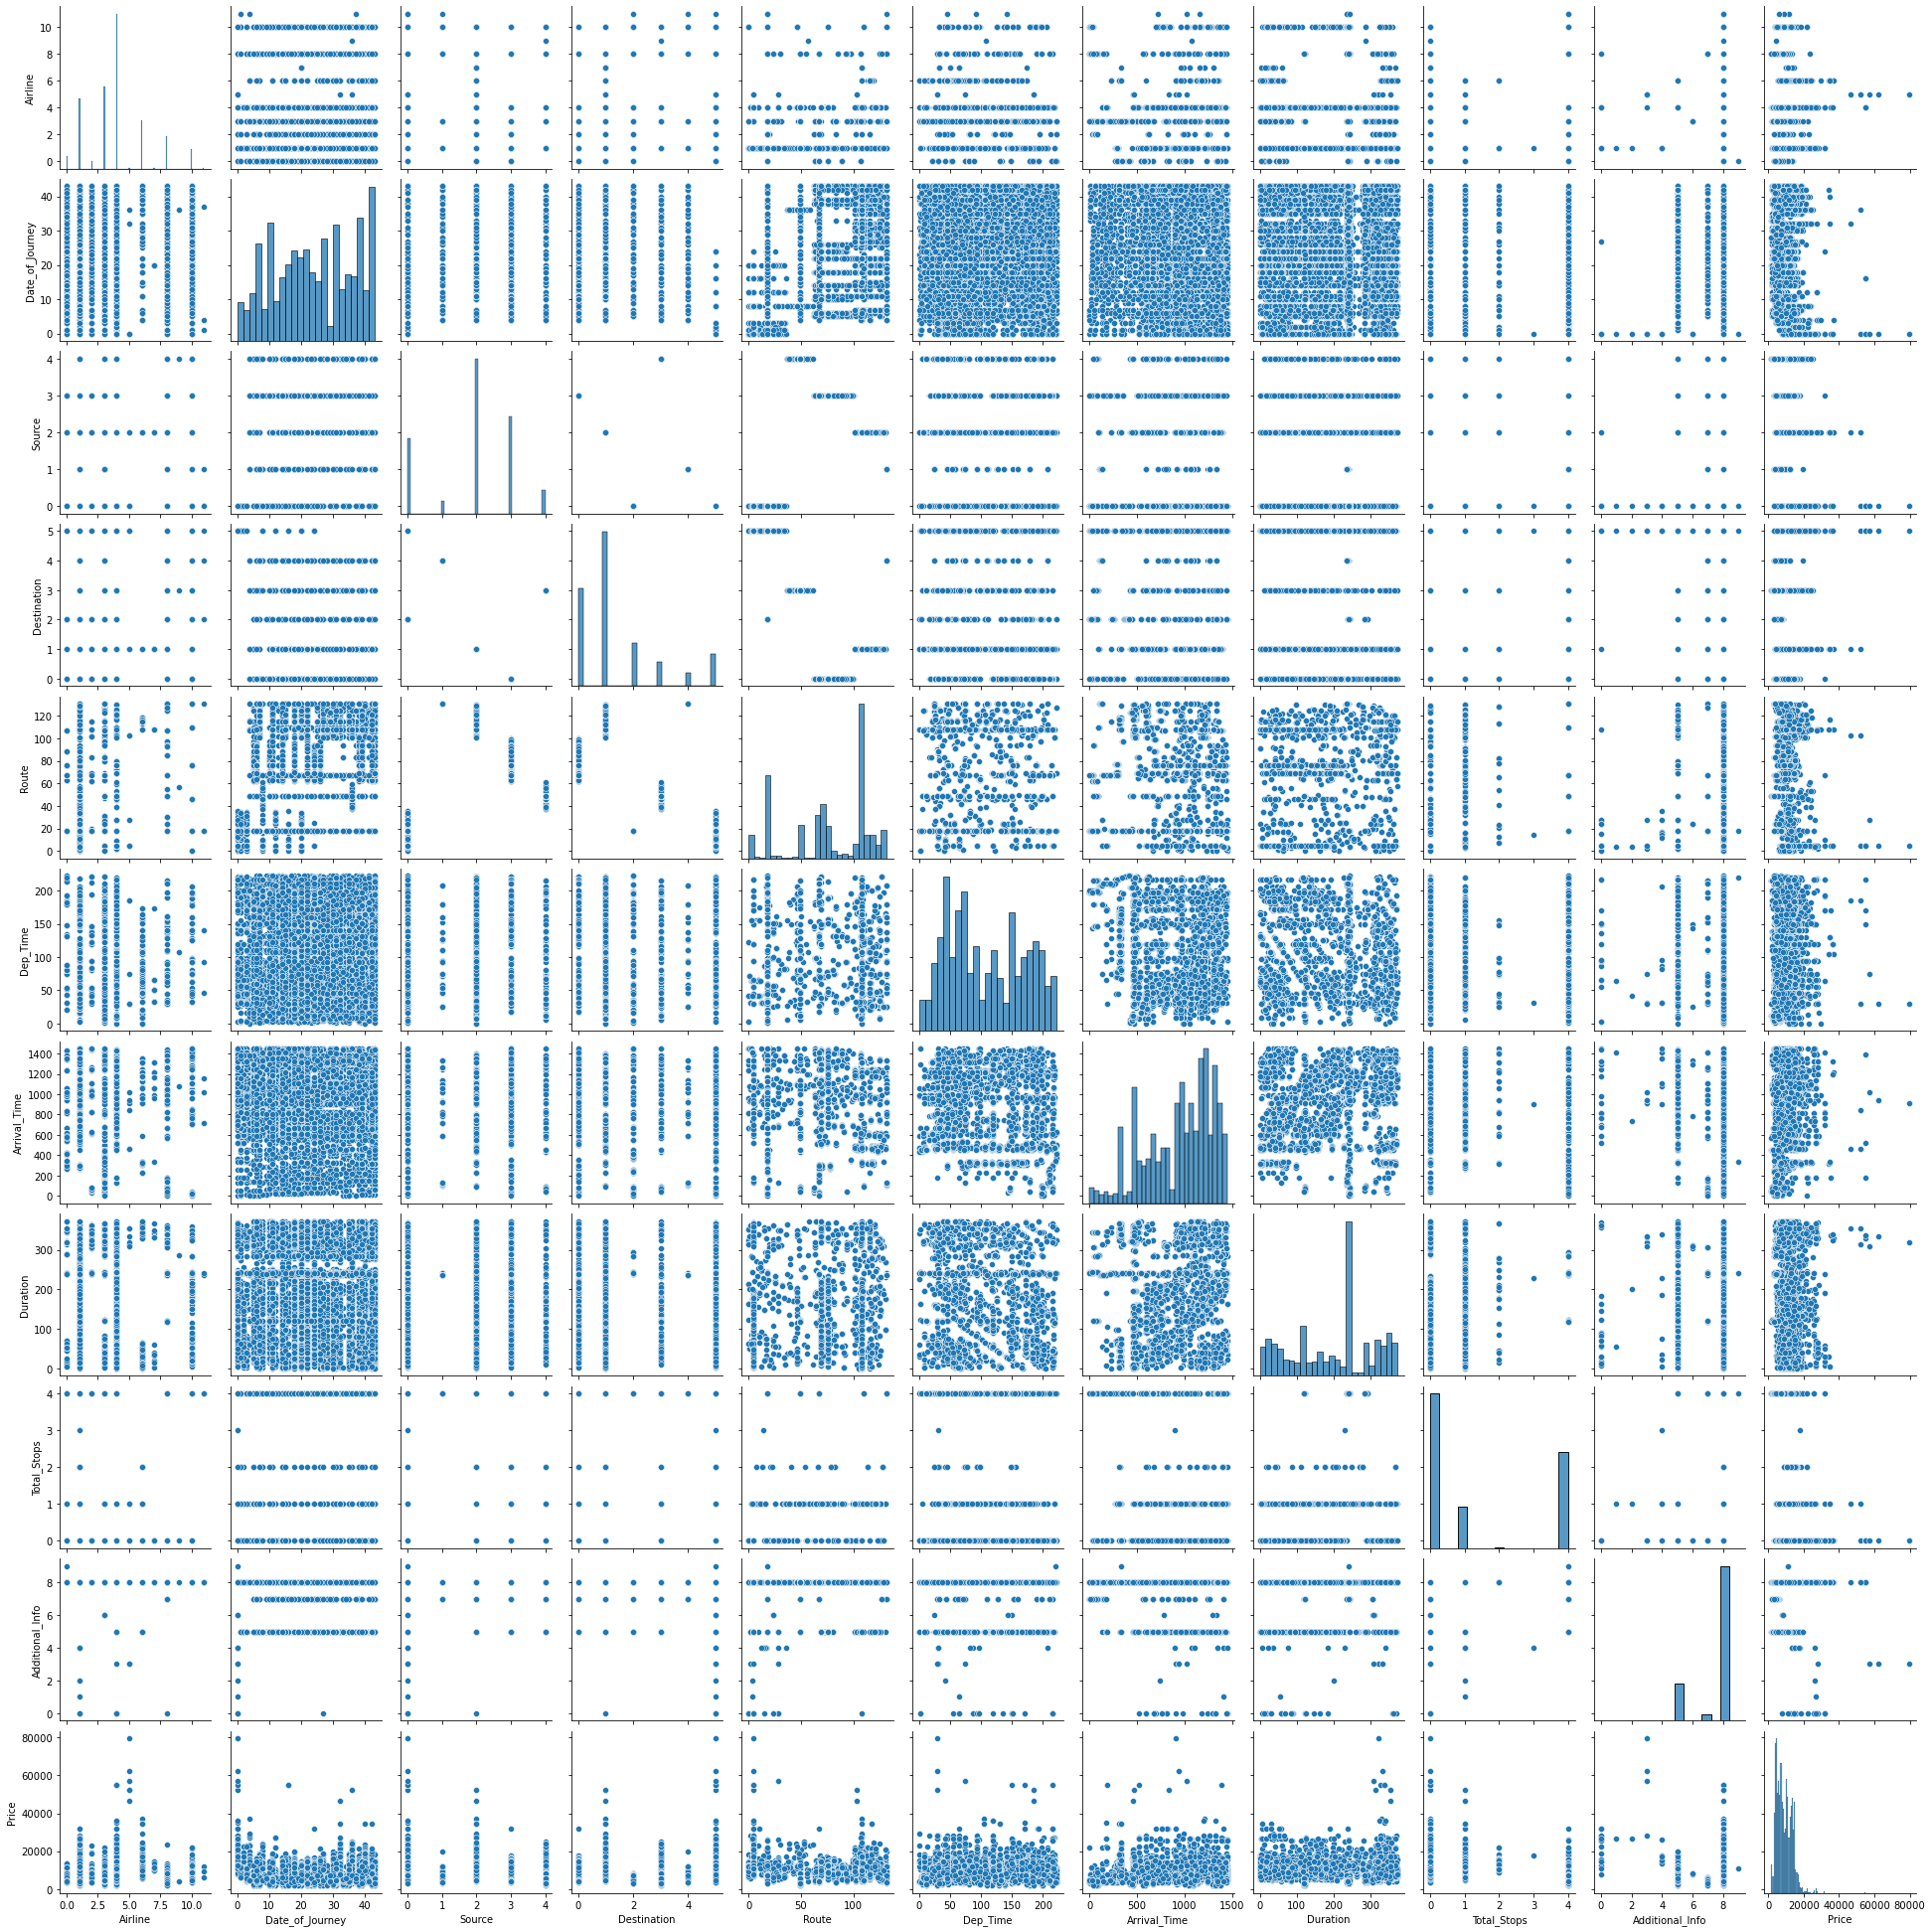

In [55]:
sns.pairplot(df)

# REMOVING OUTLIERS

In [56]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.41046413, 0.02151286, 1.65838055, ..., 1.40756001, 0.50009624,
        1.12631965],
       [1.26113732, 1.43790509, 0.89067651, ..., 0.25392416, 0.50009624,
        0.30957287],
       [0.01487247, 1.56200959, 0.04099082, ..., 0.25392416, 0.50009624,
        1.03974053],
       ...,
       [0.01487247, 0.42690674, 1.65838055, ..., 1.40756001, 0.50009624,
        0.40350417],
       [2.56689204, 1.92437775, 1.65838055, ..., 1.40756001, 0.50009624,
        0.77204716],
       [1.26113732, 1.48093082, 0.04099082, ..., 0.25392416, 0.50009624,
        0.57789355]])

In [57]:
threshold=3
print(np.where(z>3))

(array([  135,   433,   533,   558,   653,   687,   719,   853,   853,
         897,  1014,  1024,  1037,  1057,  1136,  1300,  1351,  1455,
        1540,  1584,  1596,  1763,  1788,  1922,  2058,  2199,  2224,
        2246,  2255,  2570,  2648,  2664,  2664,  2724,  2724,  2789,
        2808,  2870,  3101,  3101,  3212,  3212,  3292,  3292,  3443,
        3586,  3729,  3894,  3894,  3981,  4210,  4728,  4728,  4885,
        5040,  5223,  5223,  5346,  5581,  5581,  5648,  5835,  5870,
        5908,  5916,  5925,  5945,  5952,  6064,  6195,  6235,  6522,
        6546,  6616,  6781,  6781,  6793,  6809,  7186,  7542,  7547,
        7569,  7730,  7747,  7807,  7900,  7911,  7911,  7940,  8087,
        8199,  8256,  8617,  8635,  8698,  8752,  9000,  9079,  9095,
        9095,  9125,  9154,  9154,  9310,  9350,  9717,  9740,  9797,
       10040, 10114, 10170, 10215, 10235, 10241, 10394, 10403, 10403,
       10422, 10473, 10539, 10539], dtype=int64), array([10, 10, 10, 10, 10, 10, 10,  9, 

In [58]:
df_new=df[(z<3).all(axis=1)]
df_new

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3.0,24.0,0.0,5.0,18.0,211.0,264.0,242.0,4.0,8.0,3897.0
1,1.0,6.0,3.0,0.0,87.0,31.0,986.0,342.0,1.0,8.0,7662.0
2,4.0,43.0,2.0,1.0,122.0,70.0,468.0,106.0,1.0,8.0,13882.0
3,3.0,10.0,3.0,0.0,95.0,164.0,1430.0,317.0,0.0,8.0,6218.0
4,3.0,0.0,0.0,5.0,29.0,149.0,1331.0,309.0,0.0,8.0,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
10692,0.0,41.0,3.0,0.0,67.0,183.0,1353.0,238.0,4.0,8.0,4107.0
10693,1.0,29.0,3.0,0.0,67.0,193.0,1408.0,239.0,4.0,8.0,4145.0
10694,4.0,29.0,0.0,2.0,18.0,58.0,901.0,284.0,4.0,8.0,7229.0
10695,10.0,0.0,0.0,5.0,18.0,92.0,1019.0,240.0,4.0,8.0,12648.0


In [59]:
df.shape

(10696, 11)

In [60]:
df_new.shape

(10591, 11)

In [61]:
105/10696

0.00981675392670157

We have lost 0.09% data by removing outliers 

In [62]:
df=df_new
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3.0,24.0,0.0,5.0,18.0,211.0,264.0,242.0,4.0,8.0,3897.0
1,1.0,6.0,3.0,0.0,87.0,31.0,986.0,342.0,1.0,8.0,7662.0
2,4.0,43.0,2.0,1.0,122.0,70.0,468.0,106.0,1.0,8.0,13882.0
3,3.0,10.0,3.0,0.0,95.0,164.0,1430.0,317.0,0.0,8.0,6218.0
4,3.0,0.0,0.0,5.0,29.0,149.0,1331.0,309.0,0.0,8.0,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
10692,0.0,41.0,3.0,0.0,67.0,183.0,1353.0,238.0,4.0,8.0,4107.0
10693,1.0,29.0,3.0,0.0,67.0,193.0,1408.0,239.0,4.0,8.0,4145.0
10694,4.0,29.0,0.0,2.0,18.0,58.0,901.0,284.0,4.0,8.0,7229.0
10695,10.0,0.0,0.0,5.0,18.0,92.0,1019.0,240.0,4.0,8.0,12648.0


# DIVIDING THE COLUMNS AS x AND y

In [63]:
x=df.drop("Price",axis=1)
y=df["Price"]

# APPLYING variance_inflation_factor

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
x.shape[1]

10

In [66]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [67]:
vif_calc()

   VIF FACTOR         features
0    3.671234          Airline
1    5.112900  Date_of_Journey
2    5.762717           Source
3    3.061355      Destination
4    8.023020            Route
5    3.920522         Dep_Time
6    7.654351     Arrival_Time
7    4.388966         Duration
8    2.395894      Total_Stops
9   22.299315  Additional_Info


Multicollinearity is visible between the column 'Airline','Destination','Dep_Time' and 'Date_of_Journey','Source,we will drop "Destination","Date_of_Journey" as its has less value

In [68]:
df.drop(["Destination","Date_of_Journey"],axis=1,inplace=True)

In [69]:
df.columns

Index(['Airline', 'Source', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price'],
      dtype='object')

dropped columns are no longer present in the dataset 

# REMOVING THE SKEWNESS 

In [70]:
df.skew()

Airline            0.732430
Source            -0.438946
Route             -0.532431
Dep_Time           0.196732
Arrival_Time      -0.640258
Duration          -0.198220
Total_Stops        0.618265
Additional_Info   -1.532488
Price              0.410030
dtype: float64

In [71]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")

In [72]:
x

array([[-0.29455811,  0.05872494, -1.61521619, ...,  0.45257091,
         1.28718138,  0.52458663],
       [-1.41837653, -1.51971301,  0.89771124, ...,  1.24748171,
         0.34080436,  0.52458663],
       [ 0.14786328,  1.48871438, -0.02717441, ..., -0.75271768,
         0.34080436,  0.52458663],
       ...,
       [ 0.14786328,  0.45021754, -1.61521619, ...,  0.79318163,
         1.28718138,  0.52458663],
       [ 2.11703217, -2.20925838, -1.61521619, ...,  0.43606953,
         1.28718138,  0.52458663],
       [-1.41837653,  1.4168266 , -0.02717441, ...,  1.33182822,
         0.34080436,  0.52458663]])

Applied power_transform method to remove the skewness 

# APPLYING VARIOUS MODEL

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# LinearRegression

In [74]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)

lr.score(x_train,y_train)

0.3013272551799857

In [75]:
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.3197232077873161


By applying LinearRegression we are getting the accuracy of 0.31

# KNeighborsRegressor

In [76]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred_test=knr.predict(x_test)
print(r2_score(y_test,pred_test))

0.7671984376283835


By applying KNeighborsRegressor we are getting the accuracy of 0.76

# GradientBoostingRegressor

In [77]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_test=gb.predict(x_test)
print(r2_score(y_test,pred_test))

0.835063143450819


By applying GradientBoostingRegressor we are getting the accuracy of 0.83

# DecisionTreeRegressor

In [78]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_test=dtr.predict(x_test)
print(r2_score(y_test,pred_test))

0.8558933228249095


By applying DecisionTreeRegressor we are getting the accuracy of 0.85

# REGULARIZATION 

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [80]:
from sklearn.linear_model import Lasso 


parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [81]:
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.3197201425897278

# CHECKING THE CROSS VALIDATION SCORE

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.30148413591483114


In [84]:
print(cross_val_score(knr,x,y,cv=4).mean())

0.7420253046174692


In [85]:
print(cross_val_score(gb,x,y,cv=4).mean())

0.8277383541105826


In [86]:
print(cross_val_score(dtr,x,y,cv=4).mean())

0.8364292020509022


In [87]:
print(cross_val_score(ls,x,y,cv=4).mean())

0.30101961909108654


# ENSEMBLE TECHNIQUE

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [89]:
parameters={"criterion":["mse","mae"],"max_features":["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [90]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")

rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)

rfs=r2_score(y_test,pred_rf)
print('R2_score:',rfs*100)


rfc=(cross_val_score(rf,x,y,cv=5).mean())
print("cross_val_score:",rfc*100)

R2_score: 91.03606795546177
cross_val_score: 90.42572028317257


As we can see RandomForestRegressor is giving the best accuracy score,hence we are going to save it

# SAVING THE BEST MODEL

In [91]:
import joblib
joblib.dump(rf,"best_rf_flightfile.obj")

['best_rf_flightfile.obj']